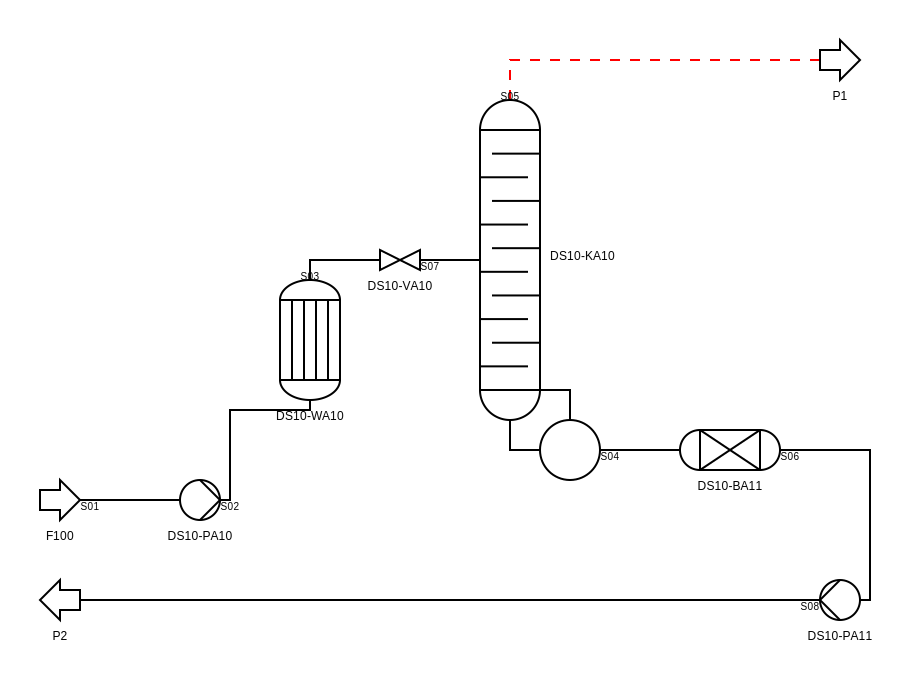

In [1]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, BitmapContext, SvgContext
from pyflowsheet import VerticalLabelAlignment, HorizontalLabelAlignment
from IPython.core.display import SVG, HTML

pfd= Flowsheet("V100-DS10","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(-80,480))
PA10=Pump("DS10-PA10","Vertical Vessel", position=(60,480))
BA10=Vessel("DS10-WA10","Vertical Vessel", position=(160,280), size=(60,120),capLength=20,internals="Tubes")
VA10=Valve("DS10-VA10","Control Valve", position=(260,250) )
KA10=Distillation("DS10-KA10","Distillation Tower", hasCondenser=False, hasReboiler=True,position=(360,100), size=(60,320), internals="trays")
BA11=Vessel("DS10-BA11","Horizontal Vessel", orientation="horizontal", position=(560,430), size=(100,40), capLength=20,internals="Bed" )
P1= StreamFlag("P1", "Product 1", position=(700,40))
P2= StreamFlag("P2", "Product 2", position=(-80,580))
PA11=Pump("DS10-PA11","Bottom Pump", position=(700,580))

pfd.addUnits( [Feed,PA10,BA10,VA10,KA10,BA11,P1,P2,PA11 ] )

pfd.connect("S01", Feed["Out"], PA10["In"] ) 
pfd.connect("S02", PA10["Out"], BA10["In"] ) 
pfd.connect("S03", BA10["Out"], VA10["In"] ) 
pfd.connect("S07", VA10["Out"], KA10["Feed"] ) 
pfd.connect("S04", KA10["Bottom"], BA11["In"] ) 
pfd.connect("S05", KA10["VOut"], P1["In"] ) 
pfd.connect("S06", BA11["Out"], PA11["In"] )
pfd.connect("S08", PA11["Out"], P2["In"] )
#Examples for Styling
pfd.streams["S05"].lineColor=(255,0,0,0,255)
pfd.streams["S05"].dashArray="10 10"

PA11.flip(axis="horizontal")
P2.flip(axis="horizontal")

KA10.setTextAnchor(HorizontalLabelAlignment.RightOuter,VerticalLabelAlignment.Center,(10,0) )
# #ctx=BitmapContext((512,512))
ctx= SvgContext("img/test.svg")
img = pfd.draw(ctx)
SVG(img.render(scale=1))



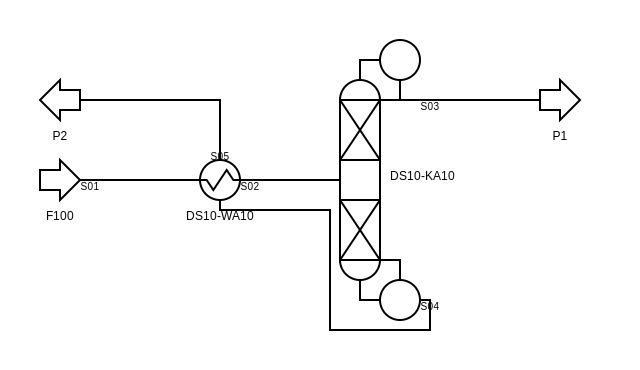

In [2]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, BitmapContext, SvgContext
from IPython.core.display import SVG, HTML
from pyflowsheet import VerticalLabelAlignment, HorizontalLabelAlignment


pfd2= Flowsheet("V100-DS20","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(0,200))
WA10=HeatExchanger("DS10-WA10","Pre-Heater", position=(160,200))
KA10=Distillation("DS10-KA10","Distillation Tower", hasCondenser=True, hasReboiler=True,position=(300,120), size=(40,200), internals="packing")
P1= StreamFlag("P1", "Product 1", position=(500,120))
P2= StreamFlag("P2", "Product 2", position=(0,120))

pfd2.addUnits( [Feed,WA10,KA10,P1,P2] )

pfd2.connect("S01", Feed["Out"], WA10["TIn"] ) 
pfd2.connect("S02", WA10["TOut"], KA10["Feed"] ) 
pfd2.connect("S03", KA10["Top"], P1["In"] ) 
pfd2.connect("S04", KA10["Bottom"], WA10["SIn"] ) 
pfd2.connect("S05", WA10["SOut"], P2["In"] ) 
pfd2.showGrid=False
#P2.rotate(180)
P2.flip(axis="horizontal")
WA10.flip(axis="vertical")
KA10.setTextAnchor(HorizontalLabelAlignment.RightOuter,VerticalLabelAlignment.Center,(10,0) )

ctx2= SvgContext("img/test2.svg")
img2 = pfd2.draw(ctx2)
SVG(img2.render(scale=1))


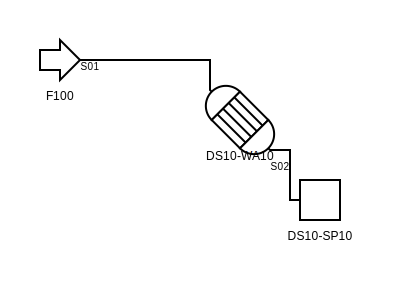

In [3]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, BitmapContext, SvgContext
from IPython.core.display import SVG, HTML


pfd3= Flowsheet("V100-DS20","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(0,200))
WA10=Vessel("DS10-WA10","Condenser", position=(160,260), orientation="horizontal", size=(80,40), internals="tubes")
SP10=BlackBox("DS10-SP10","Splitter", position=(260,340), size=(40,40))

WA10.rotate(45)
#WA10["In"].relativePosition


pfd3.addUnits( [Feed,WA10,SP10] )

pfd3.connect("S01", Feed["Out"], WA10["In"] ) 
pfd3.connect("S02", WA10["Out"], SP10["In"] ) 

ctx3= SvgContext("img/test3.svg")
img3 = pfd3.draw(ctx3)
SVG(img3.render(scale=1))


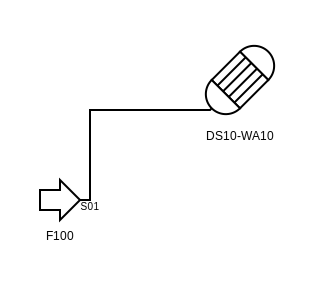

In [4]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, BitmapContext, SvgContext
from IPython.core.display import SVG, HTML


pfd3= Flowsheet("V100-DS20","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(0,400))
WA10=Vessel("DS10-WA10","Condenser", position=(180,260), orientation="vertical", size=(40,80), internals="tubes")

WA10.rotate(45)
#WA10["In"].relativePosition

pfd3.addUnits( [Feed,WA10] )

pfd3.connect("S01", Feed["Out"], WA10["In"] ) 

ctx3= SvgContext("img/test4.svg")
img3 = pfd3.draw(ctx3)
SVG(img3.render(scale=1))





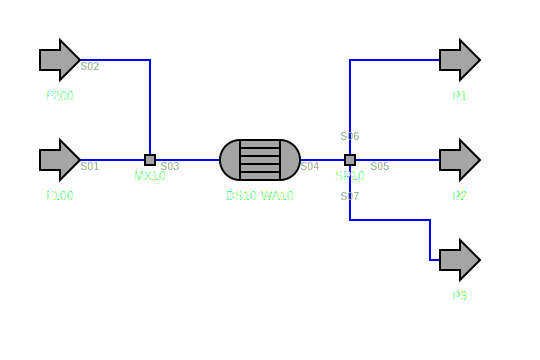

In [5]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, BitmapContext, SvgContext, Mixer,Splitter
from IPython.core.display import SVG, HTML


pfd3= Flowsheet("V100-DS20","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(0,200))
Feed2= StreamFlag("F200", "Feed", position=(0,100))
MX10= Mixer("MX10", "Mixer", position=(100,210))
WA10=Vessel("DS10-WA10","Condenser", position=(180,200), orientation="horizontal", size=(80,40), internals="tubes")

SP10= Splitter("SP10", "Splitter", position=(300,210))

P2= StreamFlag("P1", "Product 1", position=(400,100))
P1= StreamFlag("P2", "Product 2", position=(400,200))
P3= StreamFlag("P3", "Product 2", position=(400,300))



pfd3.addUnits( [Feed,Feed2, MX10, WA10, SP10, P1,P2,P3] )

pfd3.connect("S01", Feed["Out"], MX10["In1"] ) 
pfd3.connect("S02", Feed2["Out"], MX10["In2"] ) 
pfd3.connect("S03", MX10["Out"], WA10["In"] ) 
pfd3.connect("S04", WA10["Out"], SP10["In"] ) 
pfd3.connect("S05", SP10["Out1"], P1["In"] ) 
pfd3.connect("S06", SP10["Out2"], P2["In"] ) 
pfd3.connect("S07", SP10["Out3"], P3["In"] ) 
pfd3.showGrid=False

for s in pfd3.streams.values():
    s.lineColor=(0,0,255,255)
    s.textColor=(165,165,165,255)

for u in pfd3.unitOperations.values():
    u.lineColor=(0,0,0,255)
    u.fillColor=(165,165,165,255)
    u.textColor=(255,255,255,255)

ctx3= SvgContext("img/test5.svg", (0,128,128) )
img3 = pfd3.draw(ctx3)
SVG(img3.render(scale=1))





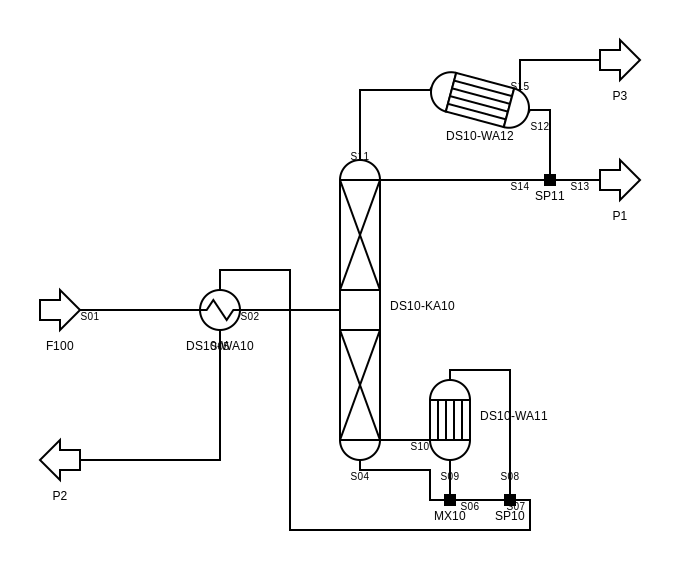

In [6]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, Mixer, Splitter, Port,BitmapContext, SvgContext
from IPython.core.display import SVG, HTML
from pyflowsheet import VerticalLabelAlignment, HorizontalLabelAlignment


pfd2= Flowsheet("V100-DS20","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(0,250))
WA10=HeatExchanger("DS10-WA10","Pre-Heater", position=(160,250))
KA10=Distillation("DS10-KA10","Distillation Tower", hasCondenser=False, hasReboiler=False,position=(300,120), size=(40,300), internals="packing")
MX10= Mixer("MX10", "Mixer", position=(400,450))
SP10= Splitter("SP10", "Splitter", position=(460,450))

WA11=Vessel("DS10-WA11","Vertical Vessel", position=(390,340), size=(40,80),capLength=20,internals="Tubes")

WA11.ports["Out2"] = Port("Out2", WA11, (0, .25), (-1, 0), intent="out")



WA12=Vessel("DS10-WA12","Condenser", position=(390,40), orientation="horizontal", size=(100,40), internals="tubes")

WA12.ports["Out2"] = Port("Out2", WA12, (0.85, 0), (0, -1), intent="out")


SP11= Splitter("SP11", "Reflux-Splitter", position=(500,130))


P1= StreamFlag("P1", "Product 1", position=(560,120))
P2= StreamFlag("P2", "Product 2", position=(0,400))
P3= StreamFlag("P3", "Product 3", position=(560,0))

BO10=BlackBox("DS10-BO10","Box", position=(160,340), size=(40,40))


pfd2.addUnits( [Feed,WA10,KA10,MX10, SP10, WA11,WA12,SP11, P1,P2,P3] )

pfd2.connect("S01", Feed["Out"], WA10["TIn"] ) 
pfd2.connect("S02", WA10["TOut"], KA10["Feed"] ) 
#pfd2.connect("S03", KA10["VOut"], P1["In"] ) 
pfd2.connect("S04", KA10["LOut"], MX10["In1"] ) 
pfd2.connect("S05", WA10["SOut"], P2["In"] ) 
pfd2.connect("S06", MX10["Out"], SP10["In"] ) 

pfd2.connect("S08", SP10["Out2"], WA11["In"] ) 
pfd2.connect("S09", WA11["Out"], MX10["In2"] ) 
pfd2.connect("S10", WA11["Out2"], KA10["VIn"] ) 
pfd2.connect("S11", KA10["VOut"], WA12["In"] ) 
pfd2.connect("S12", WA12["Out"], SP11["In"] )
pfd2.connect("S13", SP11["Out2"], P1["In"] ) 
pfd2.connect("S14", SP11["Out3"], KA10["RIn"] ) 
pfd2.connect("S15", WA12["Out2"], P3["In"] )
pfd2.connect("S07", SP10["Out1"], WA10["SIn"] ) 
pfd2.streams["S07"].manualRouting=[(14,0),(0,30),(-240,0),(0,-260),(-70,0)] 
#pfd2.streams["S07"].showPoints=True
WA12.rotate(15)
#WA12.ports["Out2"].normal=(0,-1)
#P2.rotate(180)
SP11.rotate(90)
P2.flip(axis="horizontal")
#WA10.flip(axis="vertical")
WA11.flip(axis="vertical")
KA10.setTextAnchor(HorizontalLabelAlignment.RightOuter,VerticalLabelAlignment.Center,(10,0) )
WA11.setTextAnchor(HorizontalLabelAlignment.RightOuter,VerticalLabelAlignment.Center,(10,0) )
pfd2.showGrid=False

ctx2= SvgContext("img/test6.svg")
img2 = pfd2.draw(ctx2)

SVG(img2.render(scale=1))


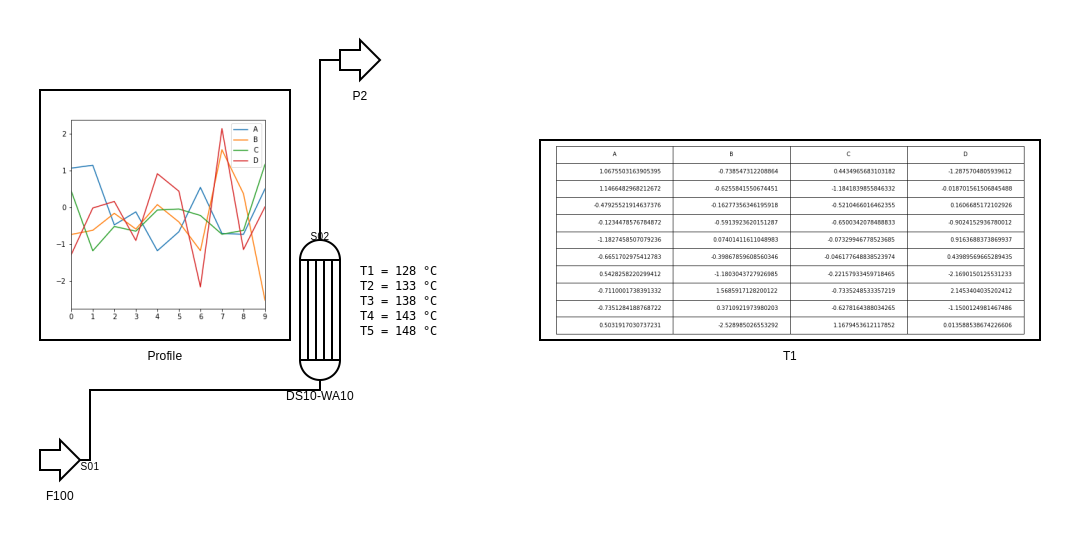

In [15]:
from pyflowsheet import Flowsheet, UnitOperation, Distillation, Vessel, BlackBox, Pump, Stream, StreamFlag, Valve,HeatExchanger, BitmapContext, SvgContext, Table, Figure, TextElement
from IPython.core.display import SVG, HTML

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.ioff()

df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

pfd3= Flowsheet("V100-DS20","Simple Distillation", "Demo Flowsheet for testing functionality")

Feed= StreamFlag("F100", "Feed", position=(0,400))
WA10=Vessel("DS10-WA10","Condenser", position=(260,200), orientation="vertical", size=(40,140), internals="tubes")
P2= StreamFlag("P2", "Product 2", position=(300,000))

pfd3.addUnits( [Feed,WA10,P2] )
pfd3.connect("S01", Feed["Out"], WA10["In"] ) 
pfd3.connect("S02", WA10["Out"], P2["In"] ) 

T1 = Table("T1", "DemoTable", data=df, position=(500,100), size=(500,200),figsize=(12,5))
fig=df.plot(kind="line",figsize=(5,5))
F1 = Figure("Profile", "DemoFigure", fig=plt.gcf(), position=(00,50), size=(250,250))

for i in range(1,6):
    pfd3.callout(f"T{i} = {123+5*i} °C", (320,220+15*i) )

pfd3.addAnnotations([F1,T1])

ctx3= SvgContext("img/test4.svg")
img3 = pfd3.draw(ctx3)
SVG(img3.render(scale=1))

  